## Adjusting X values such that volumes remain constant

In [6]:
import numpy as np
import matplotlib.pyplot as mplt
import scipy
import seaborn as sns

x_conc_arr = np.array((0.17279028, 0.1634392,  0.15498788, 0.14732953, 0.14036733))
z_arr = np.array((-0.65, -0.75, -0.85, -0.95, -1.05))
vol_arr = np.array((1.40815998e-14, 1.48872703e-14, 1.56990562e-14, 1.65151107e-14,
 1.73342576e-14))

### General relationship between [X], z, and volume

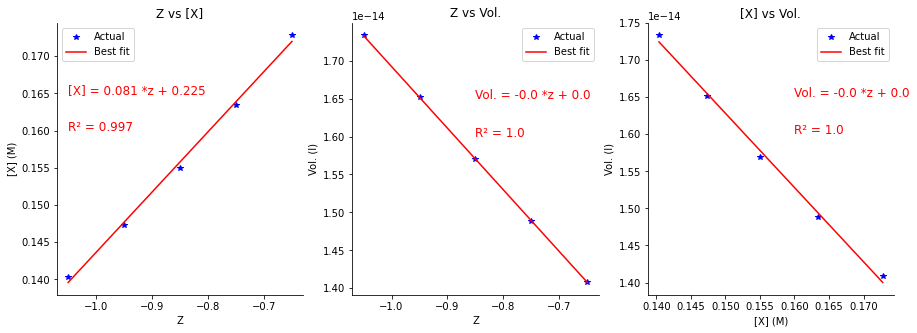

In [54]:
f_gen, [ax_zx, ax_zvol, ax_xvol] = mplt.subplots(1,3,figsize=(15,5))


###################################################################
# z vs [X]
###################################################################
ax_zx.plot(z_arr, x_conc_arr,"*" ,color='blue', label = "Actual")
ax_zx.set_title("Z vs [X]")
ax_zx.set_xlabel("Z")
ax_zx.set_ylabel("[X] (M)")


m_zx,b_zx = np.polyfit(z_arr, x_conc_arr,1)
best_fit_zx = [z_arr[i]*m_zx + b_zx for i in range(5)]
ax_zx.plot(z_arr,best_fit_zx, "-",color="red",label = 'Best fit')

formula = "[X] = "+ str(round(m_zx,3)) + ' *z + ' + str(round(b_zx,3))
ax_zx.text(-1.05, 0.165 , formula, fontsize = 12, color='red')

squaredDiffs = np.square(x_arr - best_fit_zx)
squaredDiffsFromMean = np.square(x_arr - np.mean(x_arr))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
ax_zx.text(-1.05, 0.160 , "R² = "+str(round(rSquared,3)), fontsize = 12, color='red')
#print(f"Linear R² = {rSquared}")


ax_zx.legend()

##################################################################
# z vs Vol.
##################################################################
ax_zvol.plot(z_arr, vol_arr, "*" ,color='blue', label = "Actual")
ax_zvol.set_title("Z vs Vol.")
ax_zvol.set_xlabel("Z")
ax_zvol.set_ylabel("Vol. (l)")


m_zvol,b_zvol = np.polyfit(z_arr, vol_arr,1)
best_fit_zvol = [z_arr[i]*m_zvol + b_zvol for i in range(5)]
ax_zvol.plot(z_arr,best_fit_zvol, "-",color="red",label = 'Best fit')

formula = "Vol. = "+ str(round(m_zvol,3)) + ' *z + ' + str(round(b_zvol,3))
ax_zvol.text(-0.85, 1.65e-14 , formula, fontsize = 12, color='red')

squaredDiffs = np.square(vol_arr - best_fit_zvol)
squaredDiffsFromMean = np.square(vol_arr - np.mean(vol_arr))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
ax_zvol.text(-0.85, 1.6e-14 , "R² = "+str(round(rSquared,3)), fontsize = 12, color='red')


ax_zvol.legend()


##################################################################
# [X] vs. Vol
##################################################################

ax_xvol.plot(x_conc_arr, vol_arr, "*" ,color='blue', label = "Actual")
ax_xvol.set_title("[X] vs Vol.")
ax_xvol.set_xlabel("[X] (M)")
ax_xvol.set_ylabel("Vol. (l)")

m_xvol,b_xvol = np.polyfit(x_arr, vol_arr,1)
best_fit_xvol = [x_arr[i]*m_xvol + b_xvol for i in range(5)]
ax_xvol.plot(x_arr,best_fit_xvol, "-",color="red",label = 'Best fit')


formula = "Vol. = "+ str(round(m_xvol,3)) + ' *z + ' + str(round(b_xvol,3))
ax_xvol.text(0.160, 1.65e-14 , formula, fontsize = 12, color='red')

squaredDiffs = np.square(vol_arr - best_fit_zvol)
squaredDiffsFromMean = np.square(vol_arr - np.mean(vol_arr))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
ax_xvol.text(0.160, 1.6e-14 , "R² = "+str(round(rSquared,3)), fontsize = 12, color='red')




ax_xvol.legend()

sns.despine()

## Plotting the Inverse of zx and predicting volume

m = -0.0809555699999999
b = 0.08697060950000013


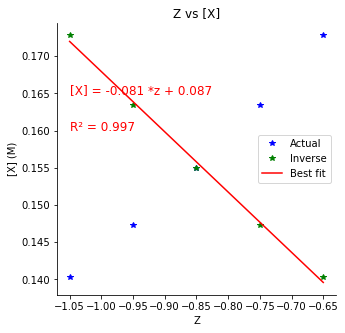

In [64]:

## if we reverse the x_conc_arr we can directly oppose the z change.
reverse_x_conc_arr = np.flip(x_conc_arr,0)


m_zrevx,c_zrevx = np.polyfit(z_arr, reverse_x_conc_arr,1)

f_inv, ax_zrevx = mplt.subplots(1,1, figsize=(5,5))

ax_zrevx.plot(z_arr, x_conc_arr,"*" ,color='blue', label = "Actual")
ax_zrevx.plot(z_arr, reverse_x_conc_arr,"*" ,color='green', label = "Inverse")
ax_zrevx.set_title("Z vs [X]")
ax_zrevx.set_xlabel("Z")
ax_zrevx.set_ylabel("[X] (M)")

m_zrevx,b_zrevx = np.polyfit(z_arr, reverse_x_conc_arr,1)
best_fit_zrevx = [z_arr[i]*m_zrevx + b_zrevx for i in range(5)]
ax_zrevx.plot(z_arr,best_fit_zrevx, "-",color="red",label = 'Best fit')

formula = "[X] = "+ str(round(m_zrevx,3)) + ' *z + ' + str(round(b_zrevx,3))
ax_zrevx.text(-1.05, 0.165 , formula, fontsize = 12, color='red')

squaredDiffs = np.square(reverse_x_conc_arr - best_fit_zrevx)
squaredDiffsFromMean = np.square(reverse_x_conc_arr - np.mean(reverse_x_conc_arr))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
ax_zrevx.text(-1.05, 0.160 , "R² = "+str(round(rSquared,3)), fontsize = 12, color='red')

ax_zrevx.legend()
sns.despine()


print("m = " + str(m_zrevx))
print("b = " + str(b_zrevx))

In [ ]:
# Seeing how this relates to volume.
# Assuming volume = F * 




def adjust_x(z,n,c):
    #reflect about y=x
    # x = nz+c
    x = n*z +c
    return x


print("[X] = " + str(round(m,2)) +"*z + " + str(round(c,2)) )
predict_arr = []
adjust_arr = []
for i in range(len(z_arr)):
    prediction = predict_x(z_arr[i],m,b)
    print("Actual = "+str(x_conc_arr[i])+" -- Prediction = "+ str(prediction))
    predict_arr.append(prediction)
    adjustment = adjust_x(z_arr[i],n,c)
    print("Actual = "+str(x_conc_arr[i])+" -- Adjustment= "+ str(adjustment))
    adjust_arr.append(adjustment)
    
mplt.plot(z_arr, predict_arr, "r*", label="Predicted")
mplt.plot(z_arr, adjust_arr, "g*", label="Adjusted")
mplt.xlabel("z")
mplt.ylabel("X")

mplt.legend()

o = -10759473340793.512
d = 0.03816464160798604
Linear R² = 0.9954883837909994
[0.07367487142329418, 0.07930945509633314, 0.0849868077834965, 0.09069401359779646, 0.09642284659907983]
exponential R² = 0.9986661420710717


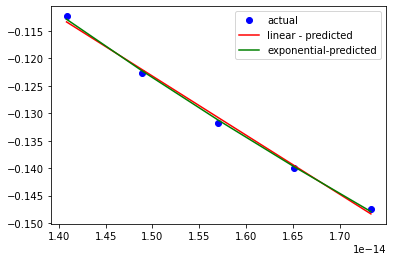

In [2]:
# predicting volume with xz and not just predicting x
import scipy.optimize

x_arr = np.array((0.17279028, 0.1634392,  0.15498788, 0.14732953, 0.14036733))
z_arr = np.array((-0.65, -0.75, -0.85, -0.95, -1.05))
vol_arr = np.array((1.40815998e-14, 1.48872703e-14, 1.56990562e-14, 1.65151107e-14,
 1.73342576e-14))
xz_arr = x_arr*z_arr

mplt.plot(vol_arr, xz_arr,'bo',label = "actual" )

o,d = np.polyfit(vol_arr, xz_arr,1)

print("o = " + str(o))
print("d = " + str(d))

def calc_xz(vol, o,d):
    # xz = vol*o +d
    xz= vol*o +d
    return xz
    
predict_xz_arr = []
for i in range(len(vol_arr)):
    predict_xz_arr.append(calc_xz(vol_arr[i],o,d))

predict_xz_arr = np.array(predict_xz_arr)
# determine quality of the fit
squaredDiffs = np.square(xz_arr - predict_xz_arr)
squaredDiffsFromMean = np.square(xz_arr - np.mean(xz_arr))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"Linear R² = {rSquared}")
    
mplt.plot(vol_arr, predict_xz_arr, 'r-', label = "linear - predicted")


chosen_vol = 1.56990562e-14
chosen_z = -0.65

def calc_x(z,vol,o,d):
    xz = calc_xz(vol,o,d)
    x = xz*z
    return x

predicted_x = calc_x(chosen_z,chosen_vol,o,d)

predict_x_arr = []
for i in range(len(vol_arr)):
    predict_x_arr.append(calc_x(chosen_z, vol_arr[i],o,d))

print(predict_x_arr)


def monoExp(x, m, t, b):
    return m * np.log(t * x) + b

############## 
# plotting an exponential line of best fit
p0 = (40200525428561.67, .1, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, vol_arr, xz_arr, p0)
m, t, b = params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate


# determine quality of the fit
squaredDiffs = np.square(xz_arr - monoExp(vol_arr, m, t, b))
squaredDiffsFromMean = np.square(xz_arr - np.mean(xz_arr))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"exponential R² = {rSquared}")

# plot the results

y_curve_arr = [monoExp(vol_arr[i], m, t, b) for i in range(len(vol_arr))]

mplt.plot(vol_arr, y_curve_arr,"g-",label="exponential-predicted")
mplt.legend()